In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

<div>
<img src="071824.png" width="500"/>
</div>

In [2]:
as_synthesized = pd.read_excel("./UVVis/2D_repeat_NO_redisperse.xlsx", engine='openpyxl')
redisperse = pd.read_excel("./UVVis/2D_repeat_WITH_redisperse.xlsx", engine='openpyxl')
dilute = pd.read_excel("./UVVis/2D_repeat_dilute.xlsx", engine='openpyxl')
water = as_synthesized["G9"].to_numpy()
wavelength = as_synthesized["Wavelength"].to_numpy()

In [3]:
volumes = pd.read_csv("./volumes_repeat_071724.csv")
times = pd.read_csv("./times_repeat_071724.csv")

In [4]:
volumes

Water  HEPES  Z2M246I  Au  Z2
0     123     54       87  13   3
1      76     54       87  13  50
2      53     54       87  13  73
3     100     54       87  13  26
4      88     54       87  13  38
..    ...    ...      ...  ..  ..
75    106     54       87  13  20
76     94     54       87  13  32
77     67     54       87  13  59
78    100     54       87  13  26
79     75     54       87  13  51

[80 rows x 5 columns]

In [5]:
well_names = as_synthesized.columns[1:-1].values

In [6]:
conc_peptide_A = (0.3*87)/(volumes[["Water", "HEPES", "Z2M246I"]].sum(axis=1).values)
# conc_peptide_A = (0.3*54)/(volumes[["Water", "HEPES"]].sum(axis=1).values)
conc_peptide_B = (0.3*volumes["Z2"].values)/(280.0)
ratio_BA = conc_peptide_B/conc_peptide_A

In [7]:
def background_correct_normalize(y):
    bkg_y = y-water 
    bkg_y_normalized = (bkg_y-min(bkg_y))/(max(bkg_y) - min(bkg_y))

    return bkg_y_normalized

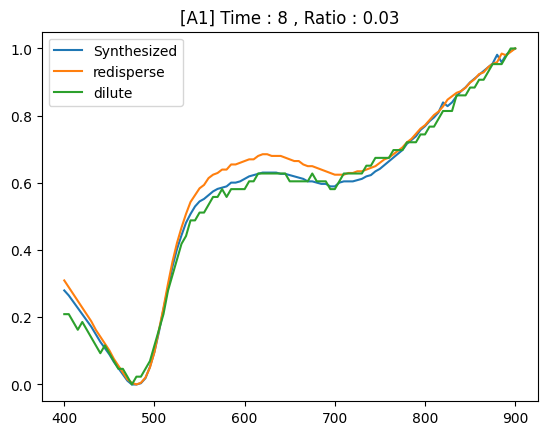

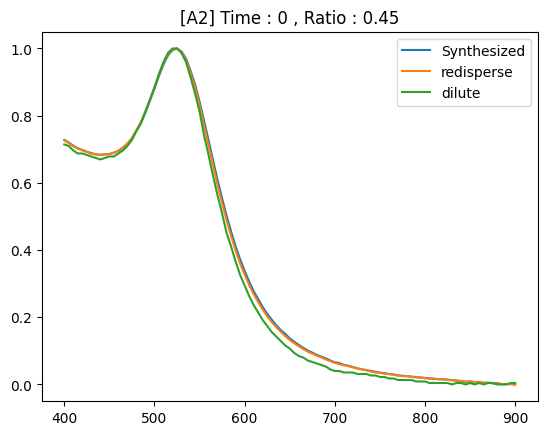

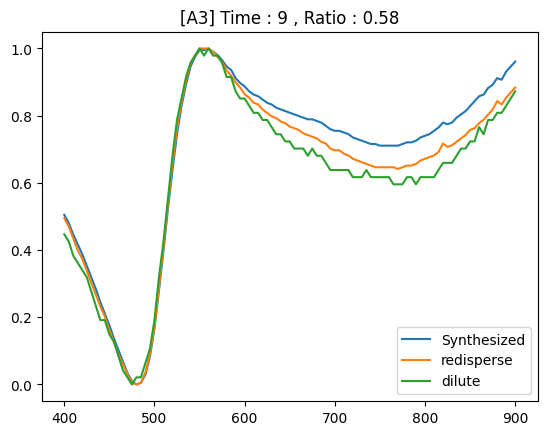

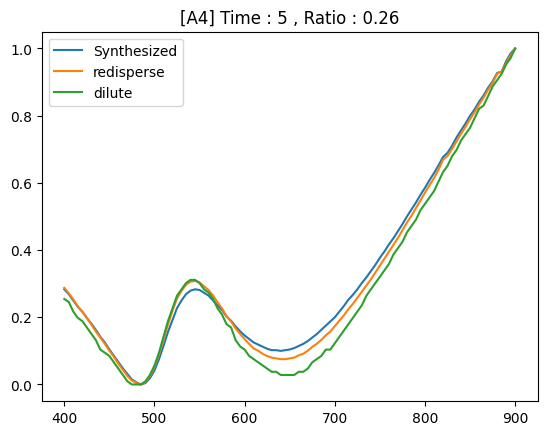

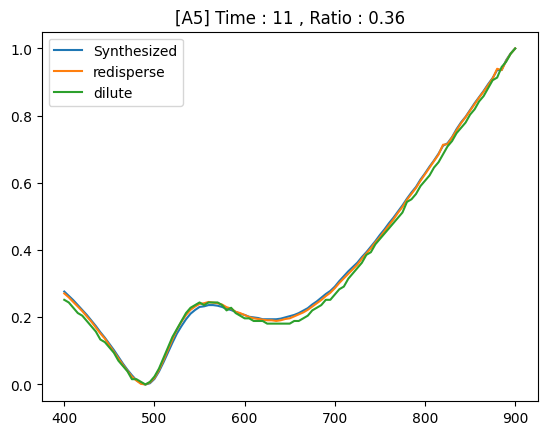

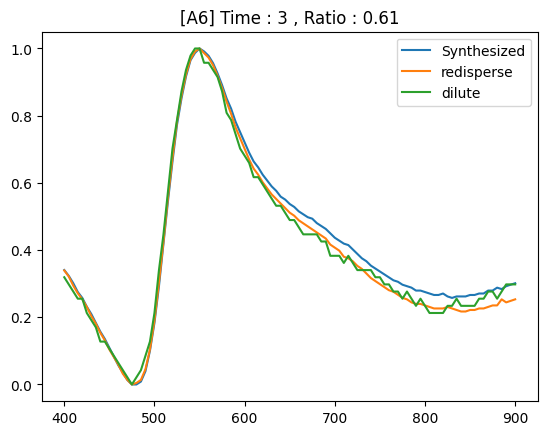

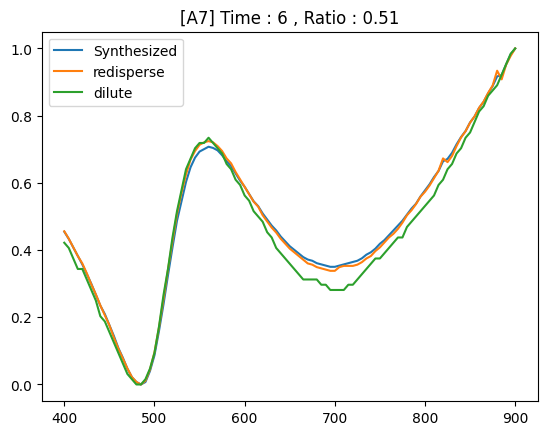

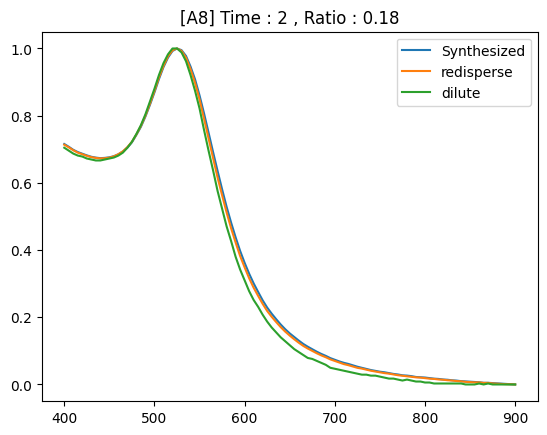

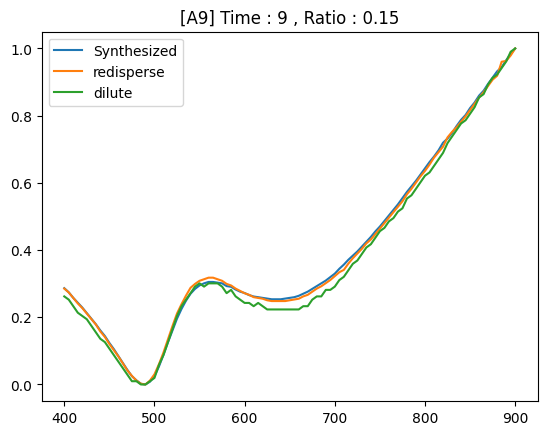

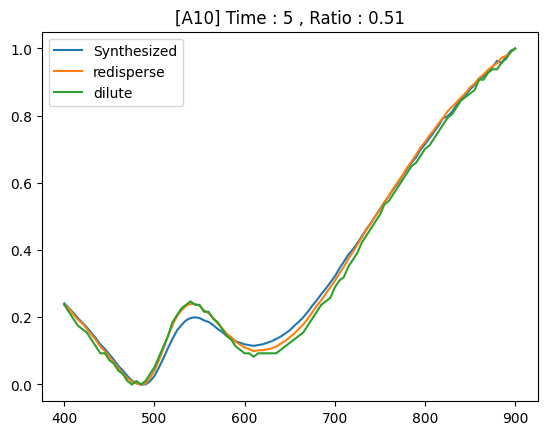

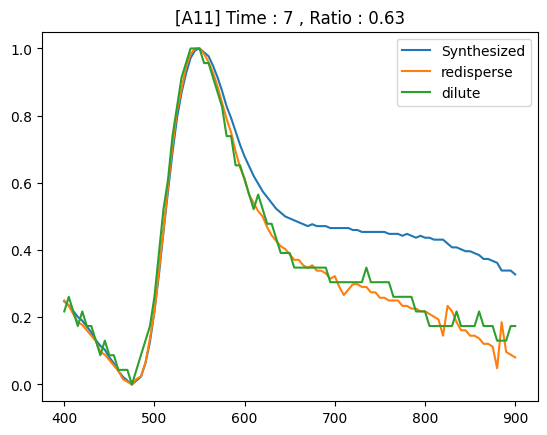

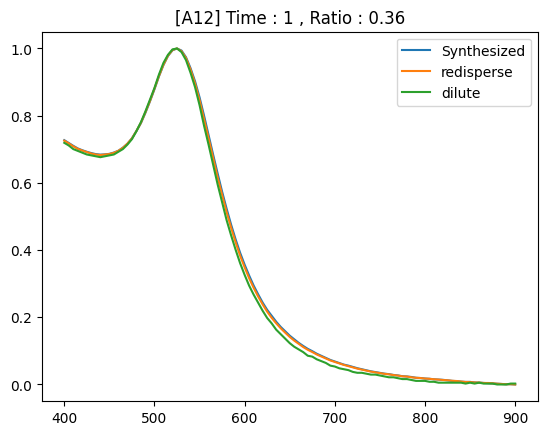

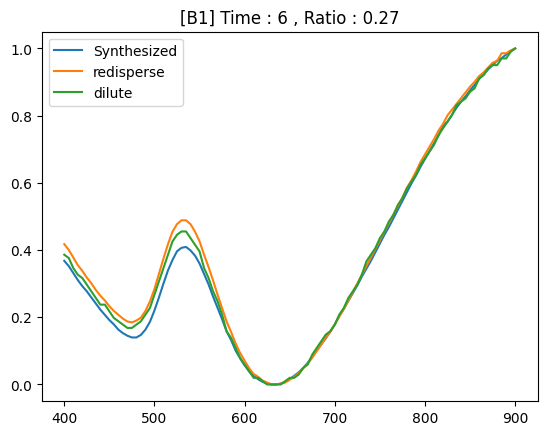

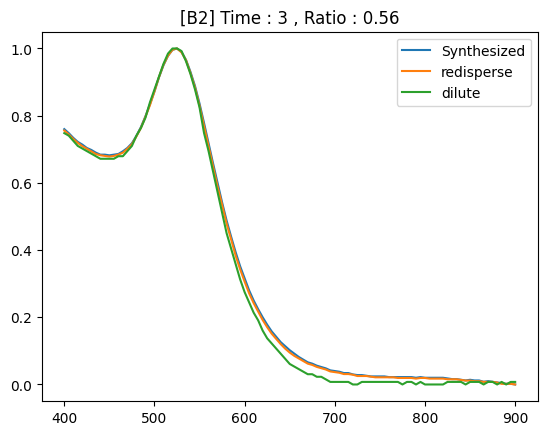

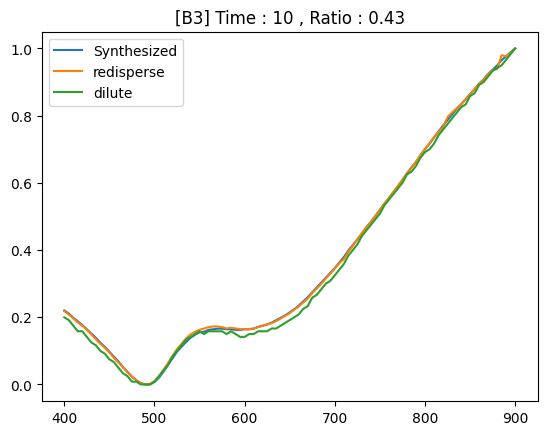

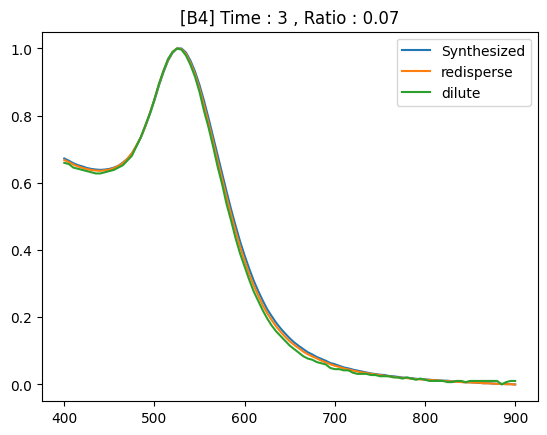

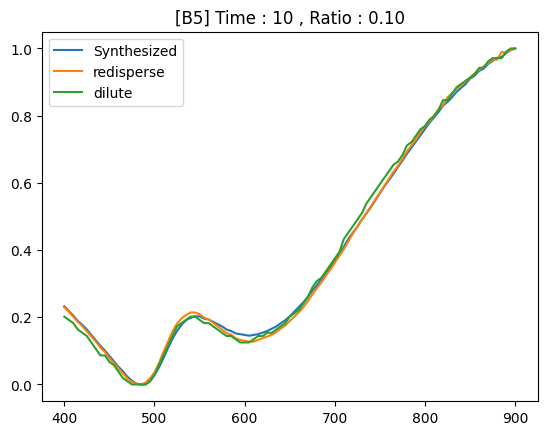

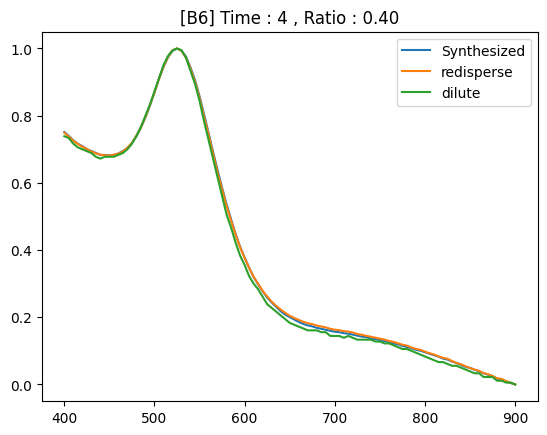

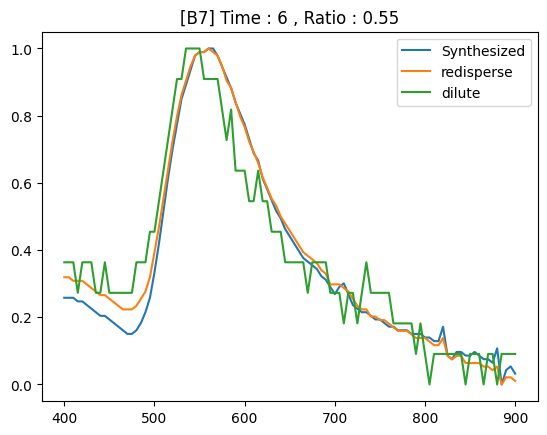

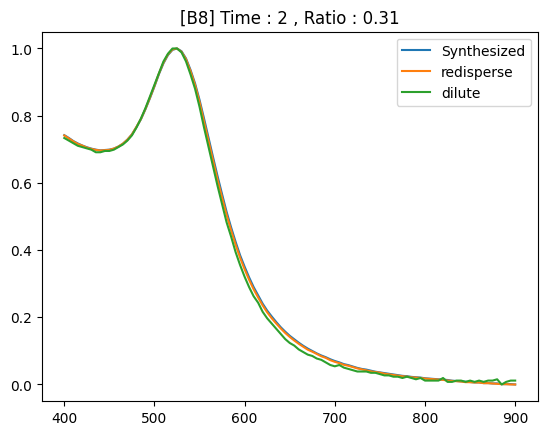

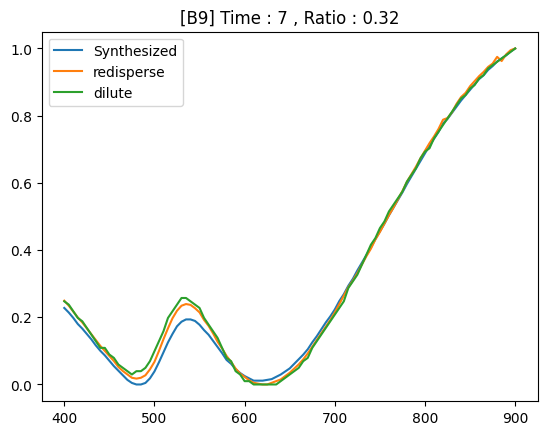

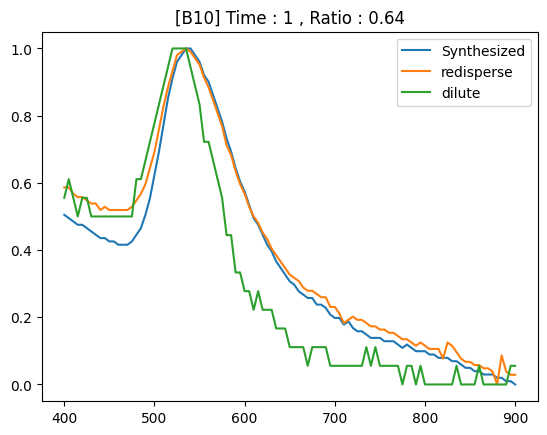

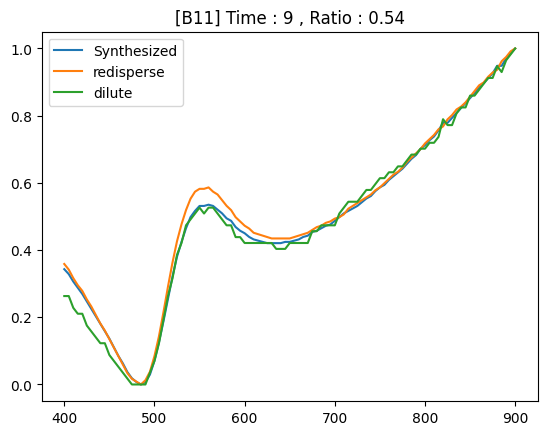

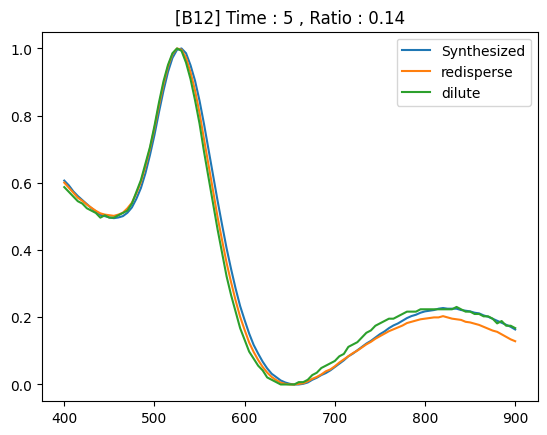

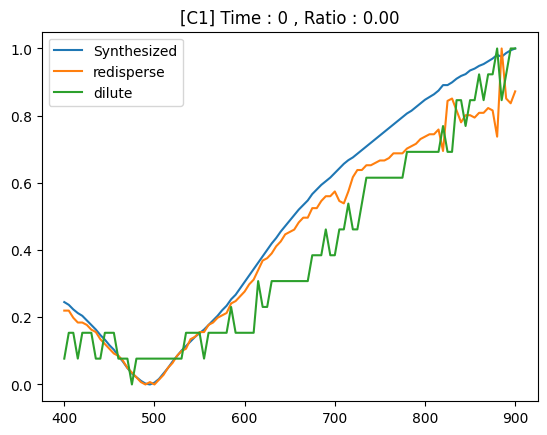

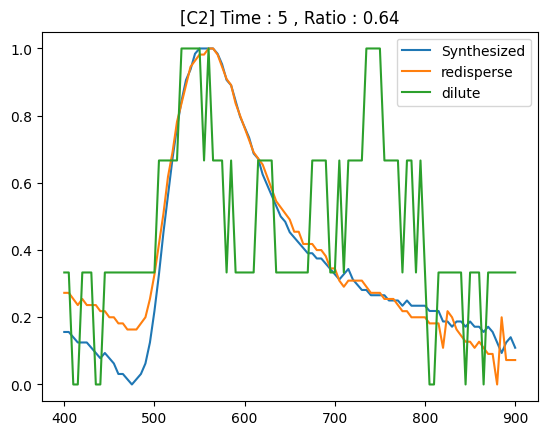

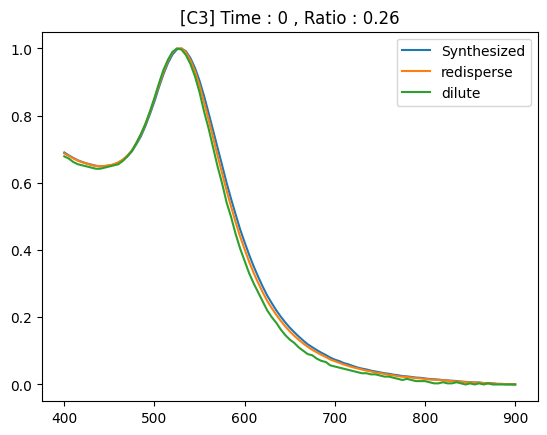

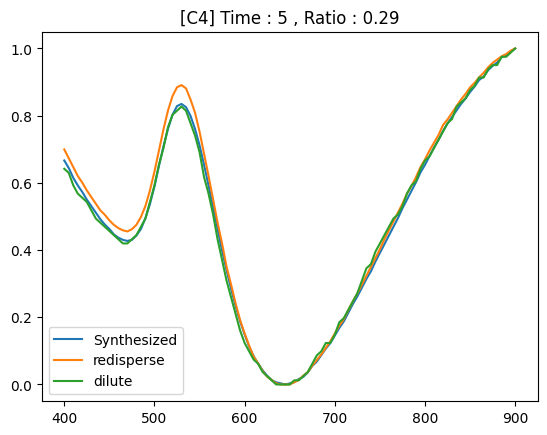

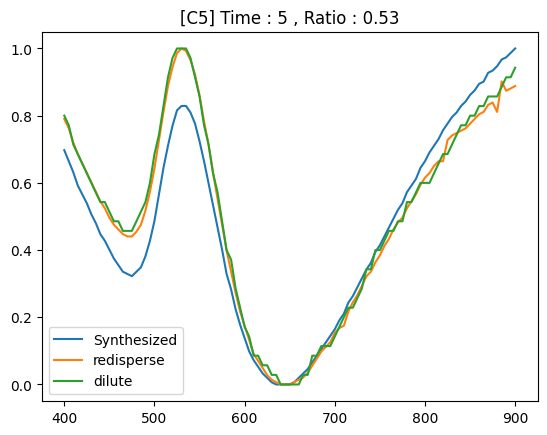

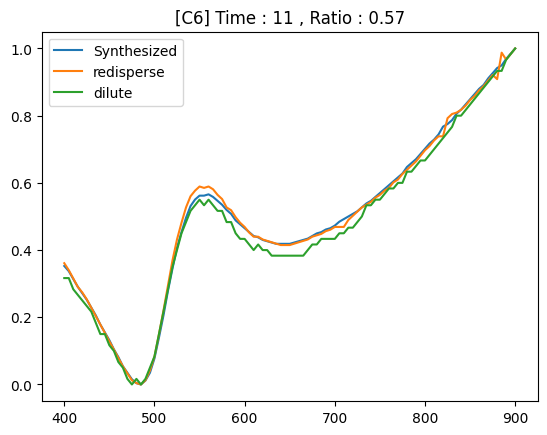

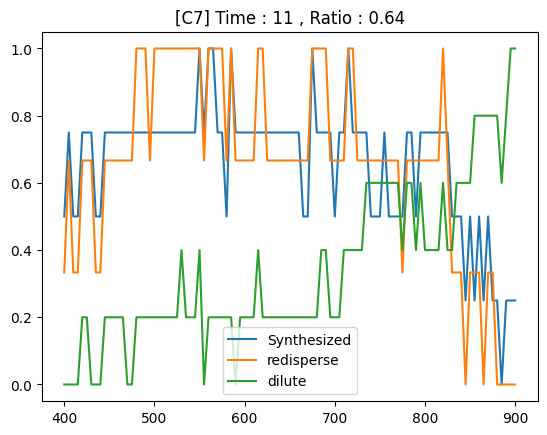

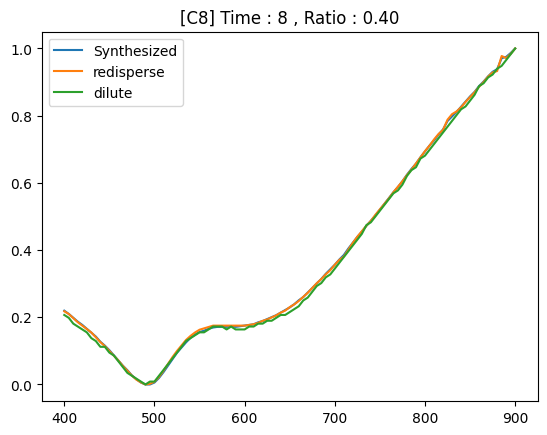

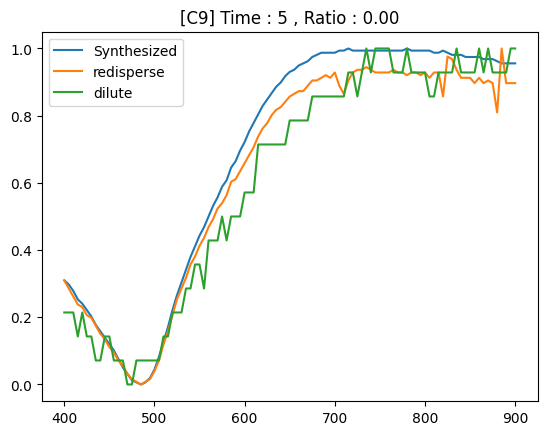

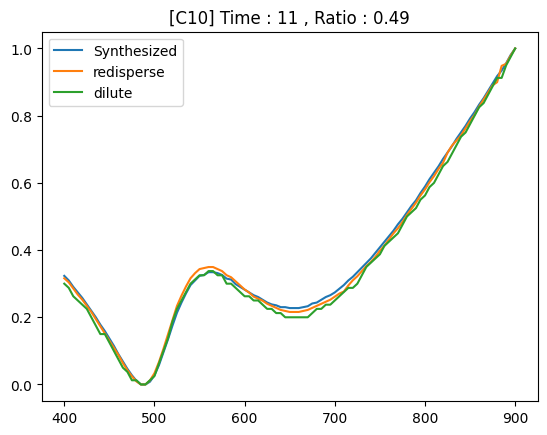

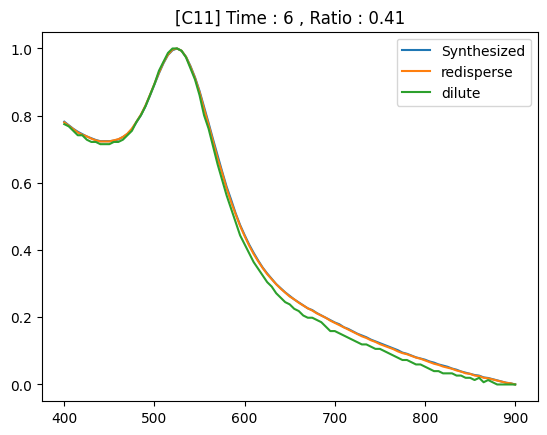

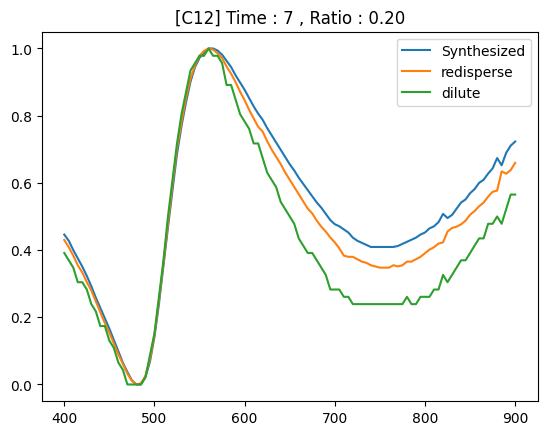

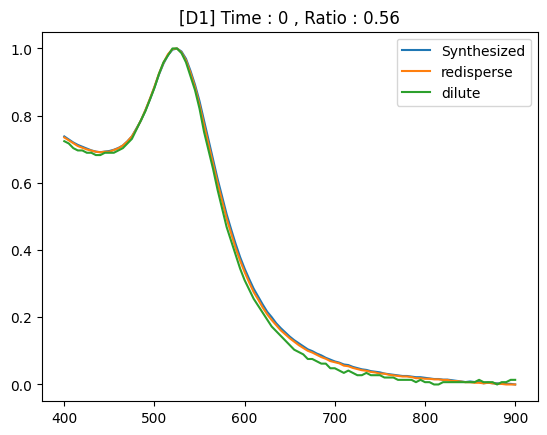

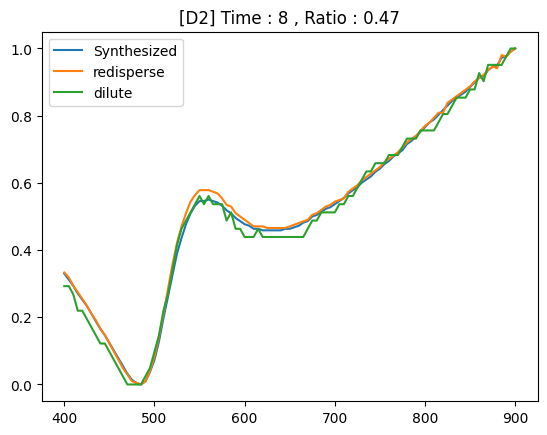

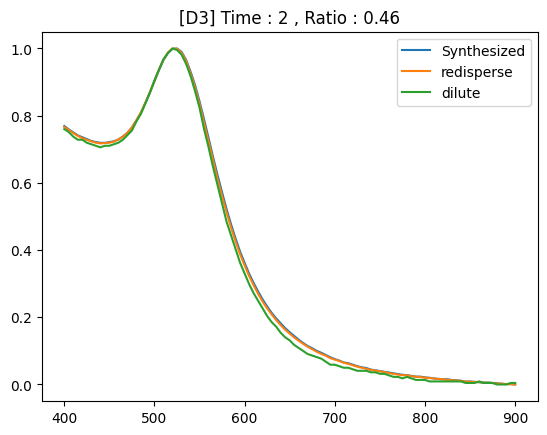

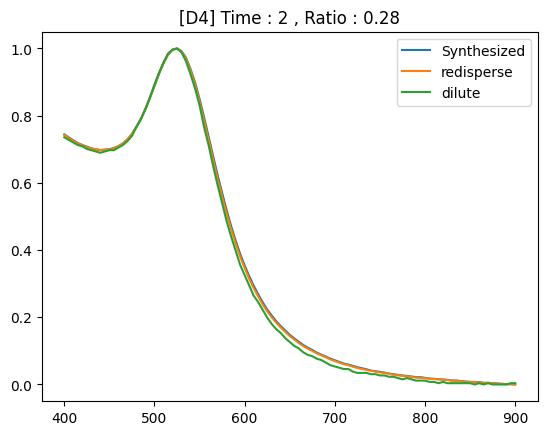

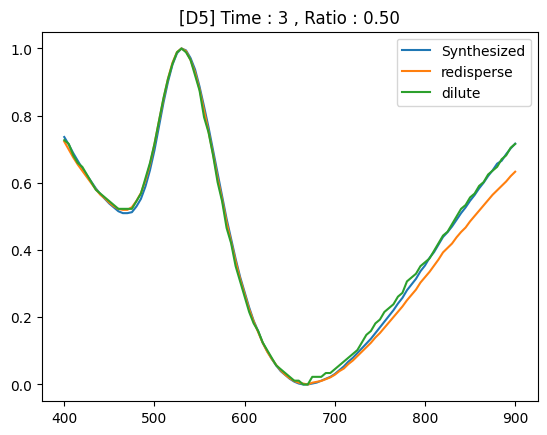

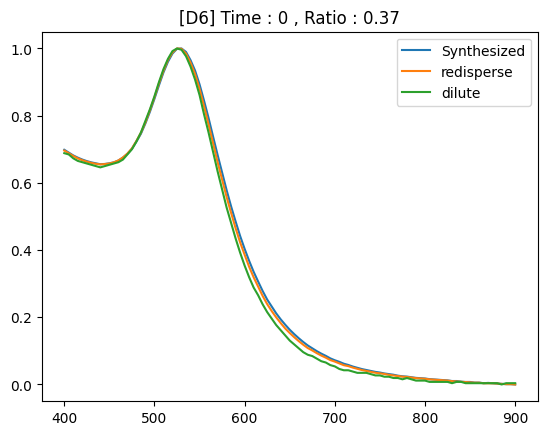

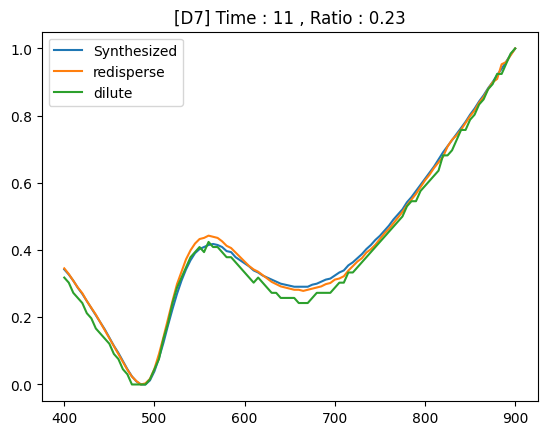

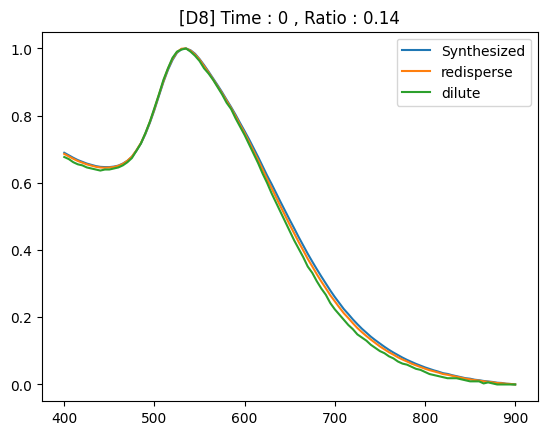

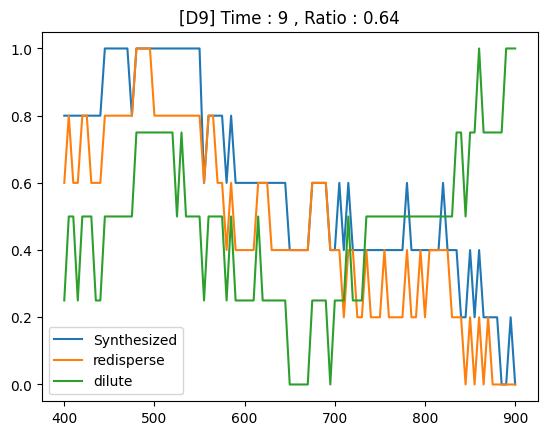

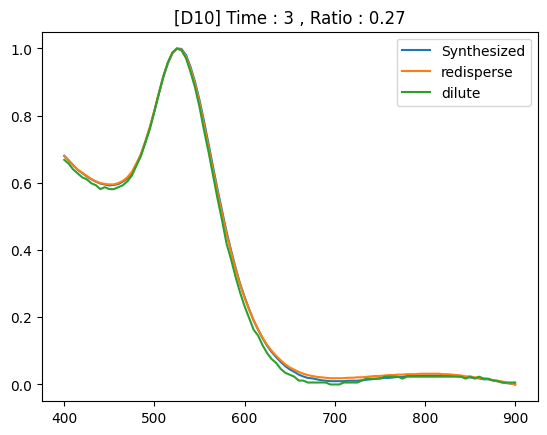

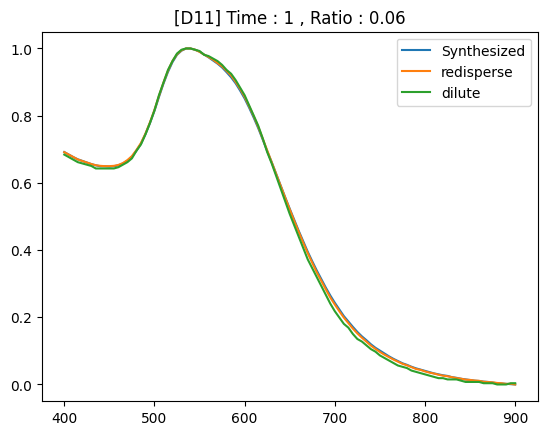

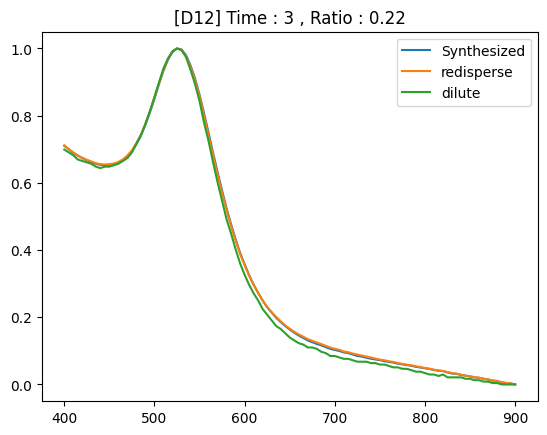

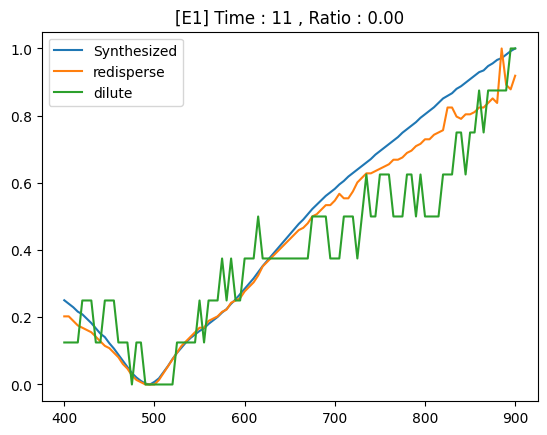

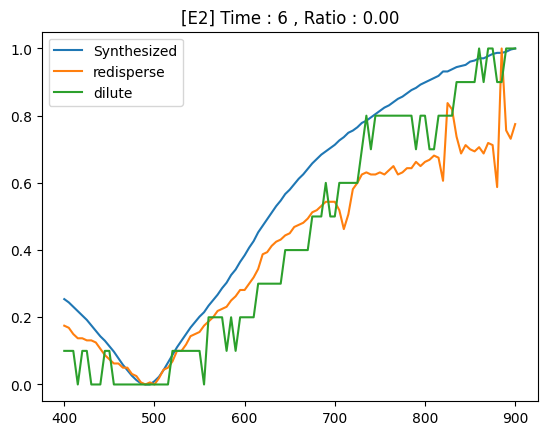

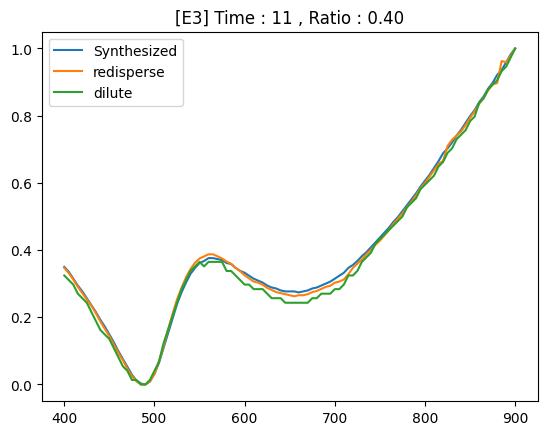

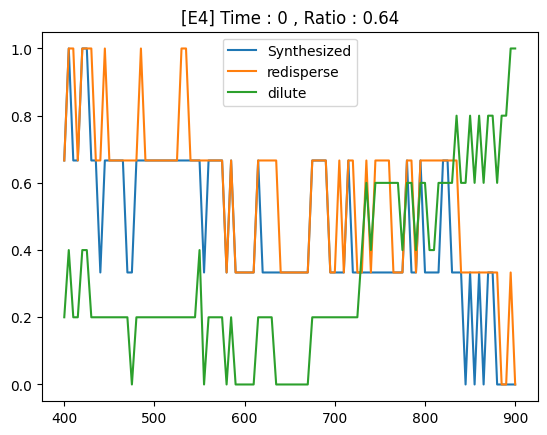

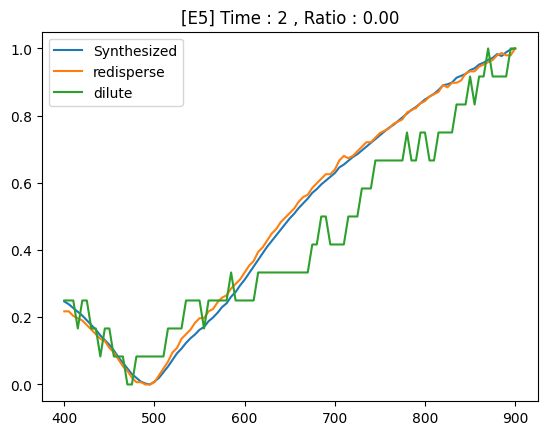

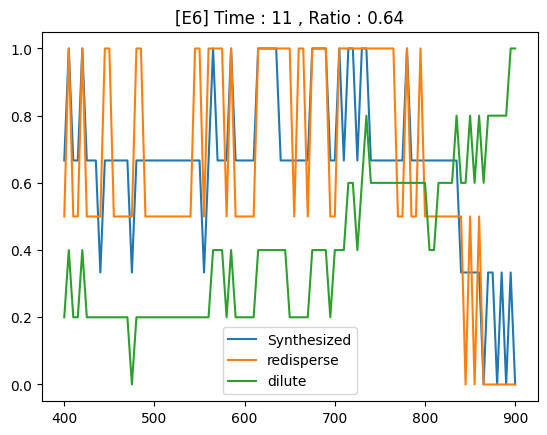

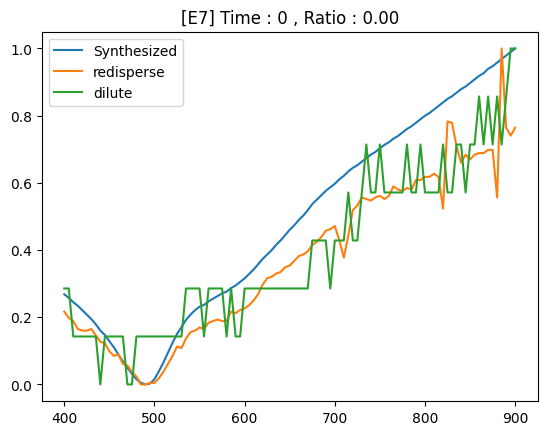

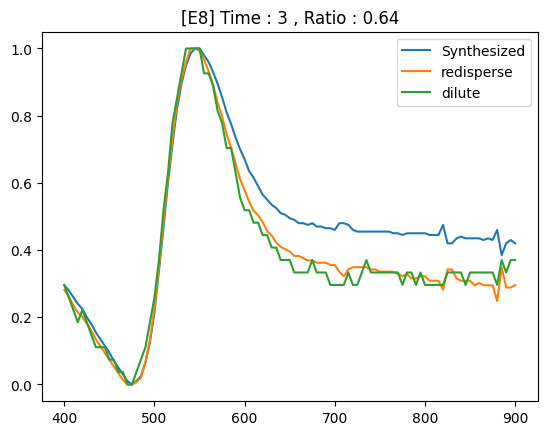

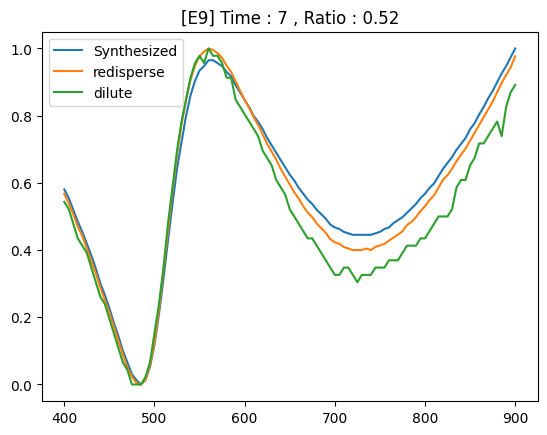

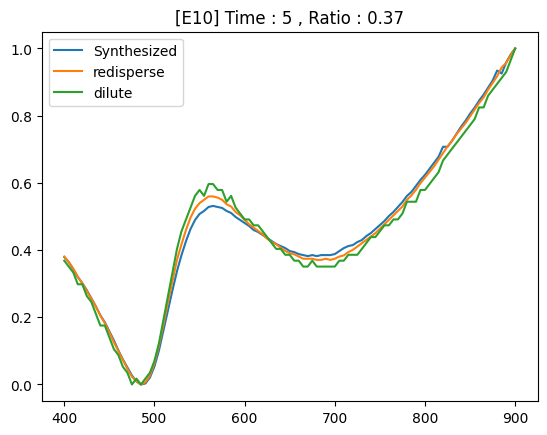

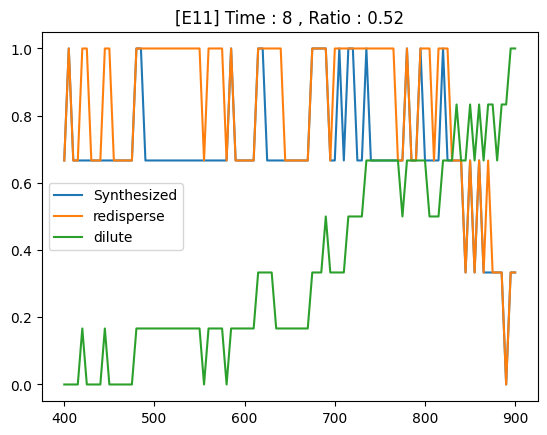

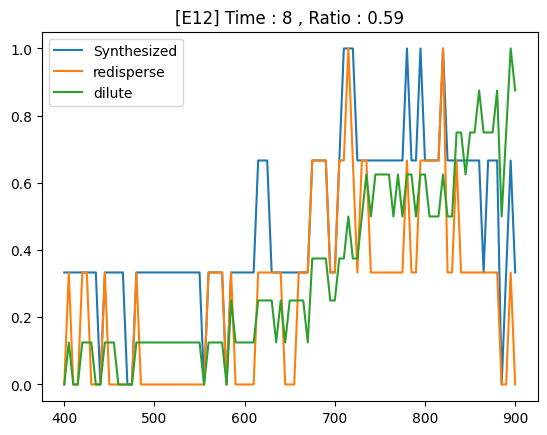

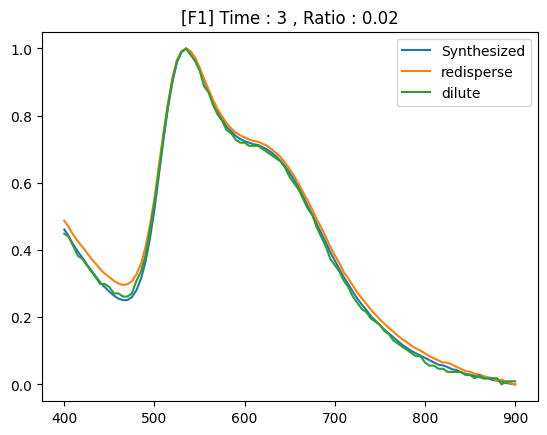

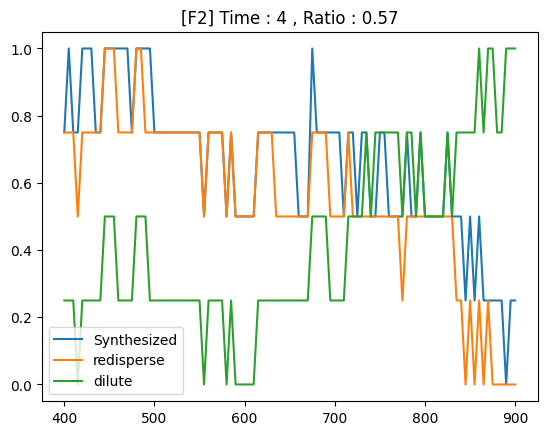

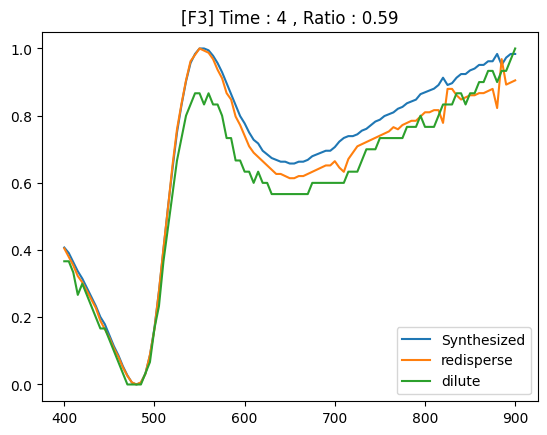

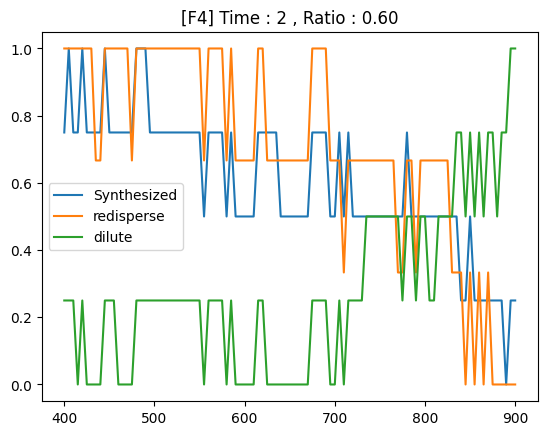

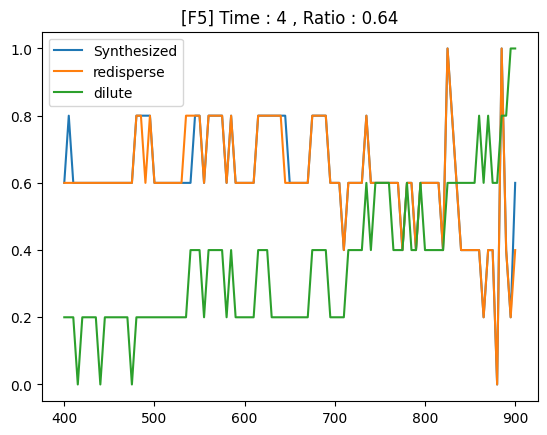

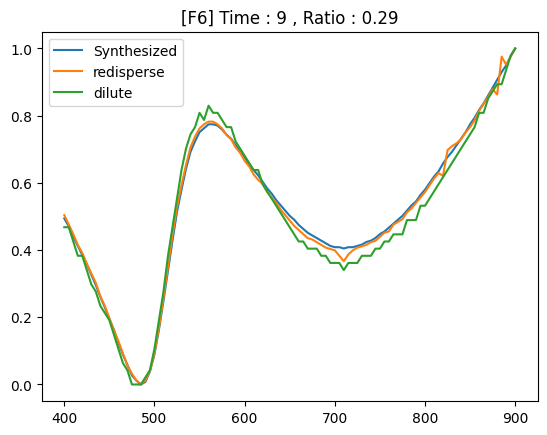

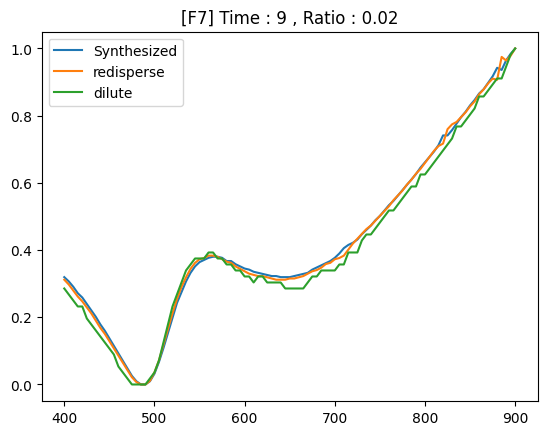

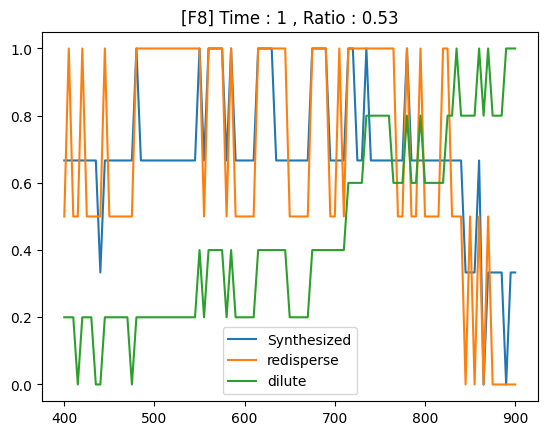

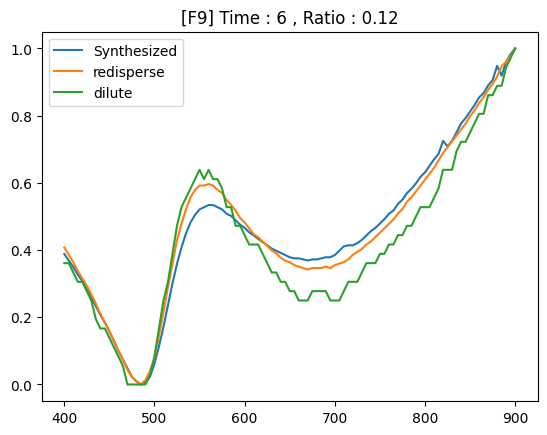

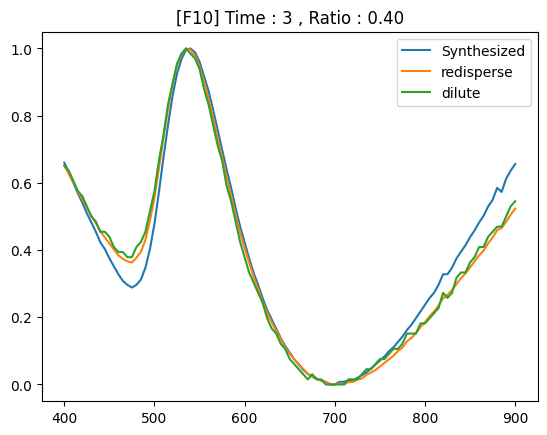

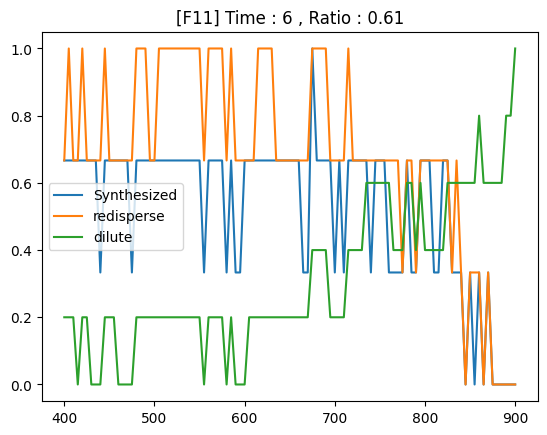

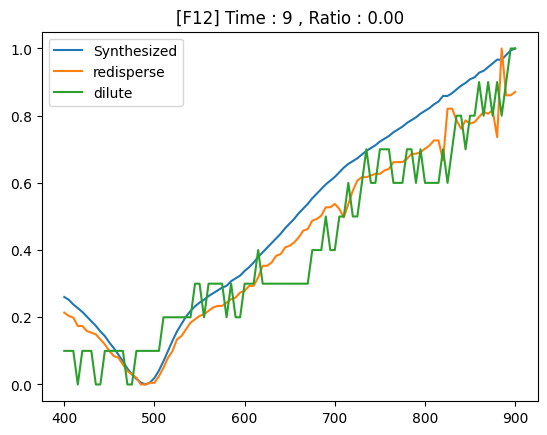

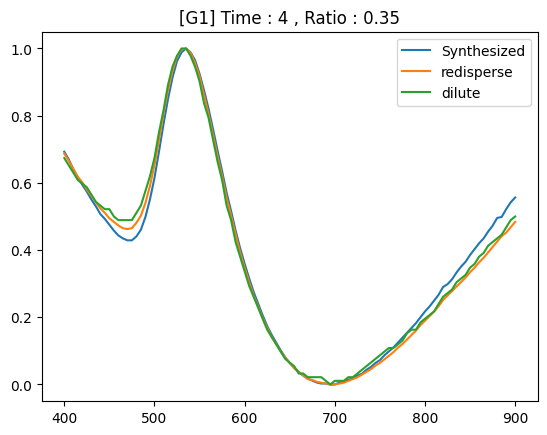

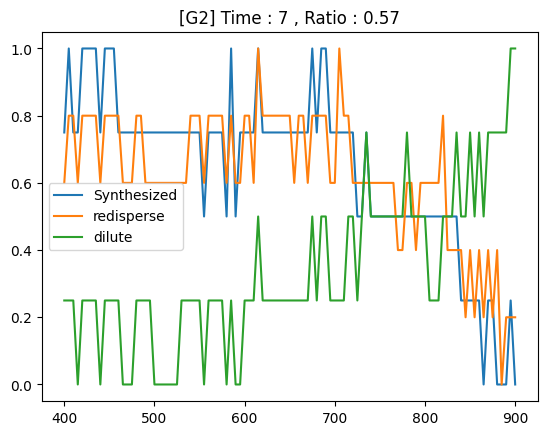

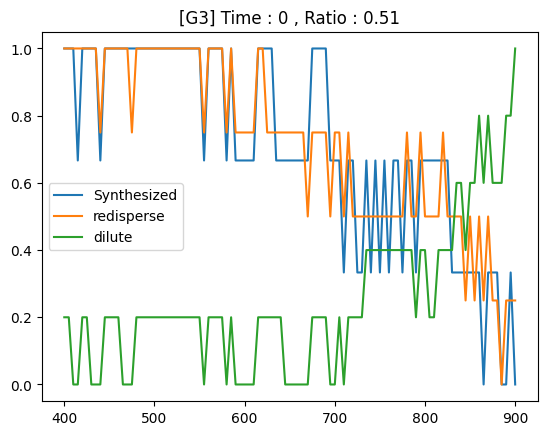

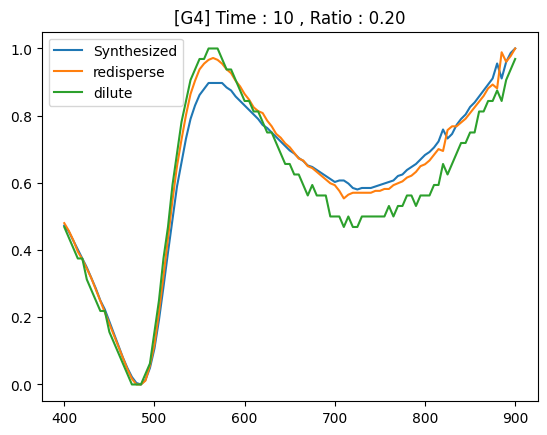

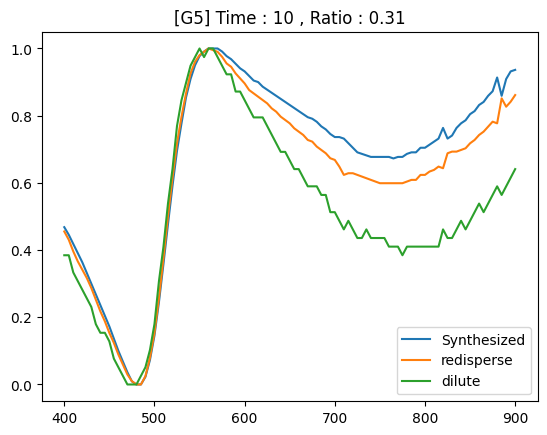

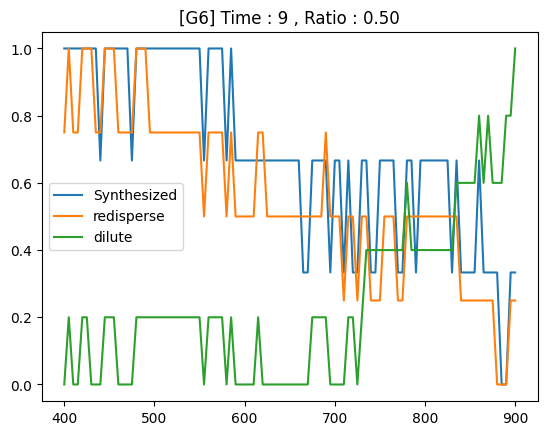

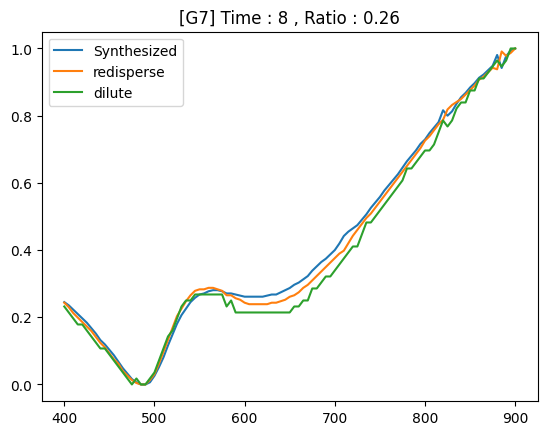

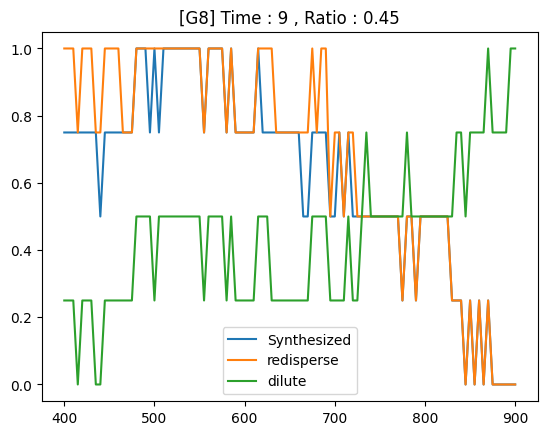

In [13]:
# rid = np.random.choice(np.arange(len(well_names)))
# well_name = well_names[rid]
for rid, well_name in enumerate(well_names):
    fig, ax = plt.subplots()
    ratio = ratio_BA[rid]
    time = times["DT4"].values[rid]
    ax.plot(wavelength, background_correct_normalize(as_synthesized[well_name].values), label="Synthesized")
    ax.plot(wavelength, background_correct_normalize(redisperse[well_name].values), label="redisperse")
    ax.plot(wavelength, background_correct_normalize(dilute[well_name].values), label="dilute")
    ax.set_title("[%s] Time : %d , Ratio : %.2f"%(well_name, time, ratio))
    ax.legend()
    plt.show()

### Plot data on the composition

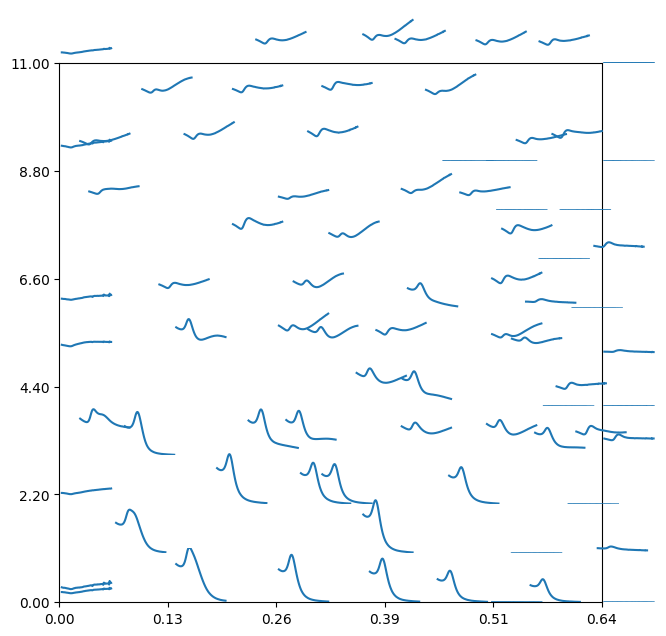

In [9]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

spectra = []
for well_name in well_names:
    y = redisperse[well_name].values-water
    spectra.append(y)

spectra = np.asarray(spectra)
comps = np.stack((ratio_BA, times["DT4"].values)).T
bounds = np.asarray([(ratio_BA.min(), ratio_BA.max()), (0.0,11.0)]).T
fig, ax = plt.subplots(figsize=(7,7))
plot_phasemap(bounds, ax, comps, spectra, limits=[0,1.4])

### Find samples with no nanoparticles

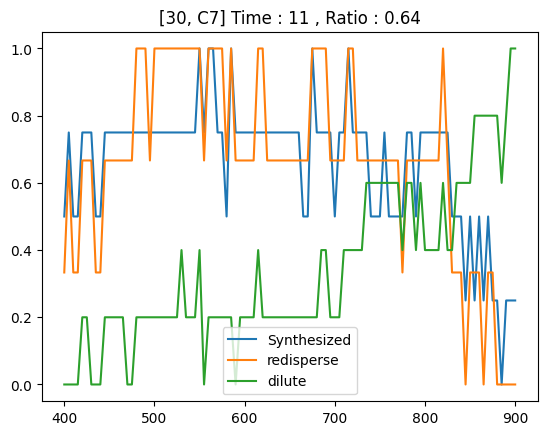

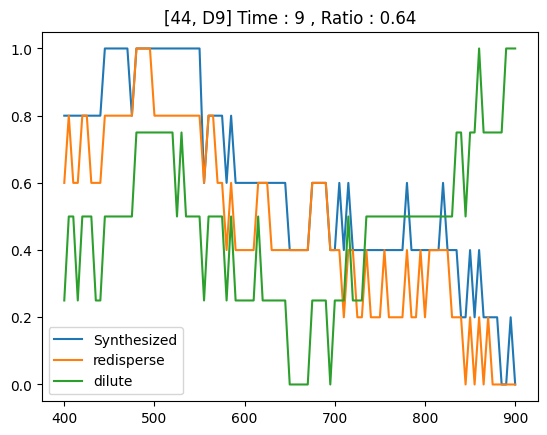

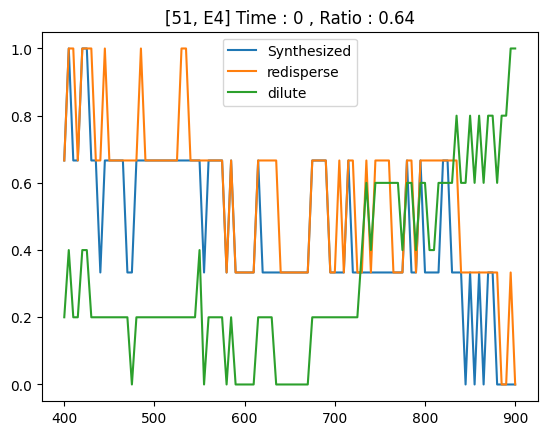

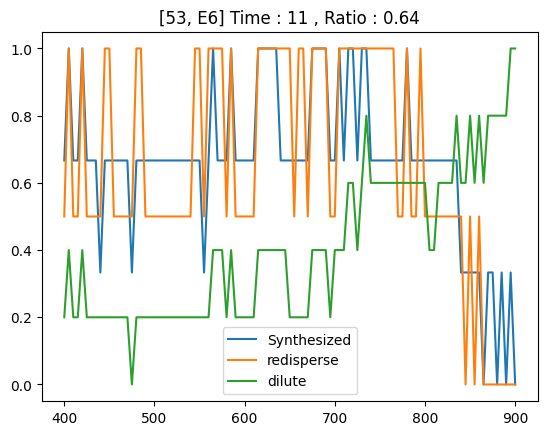

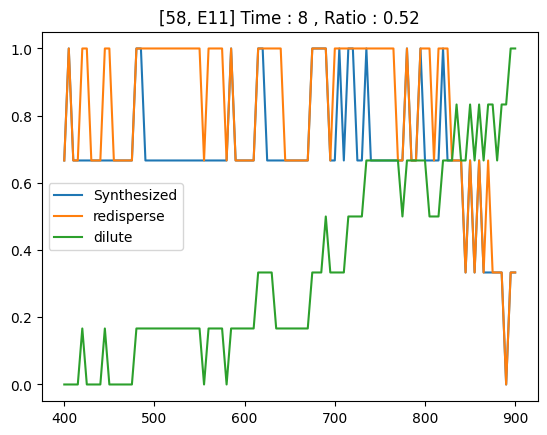

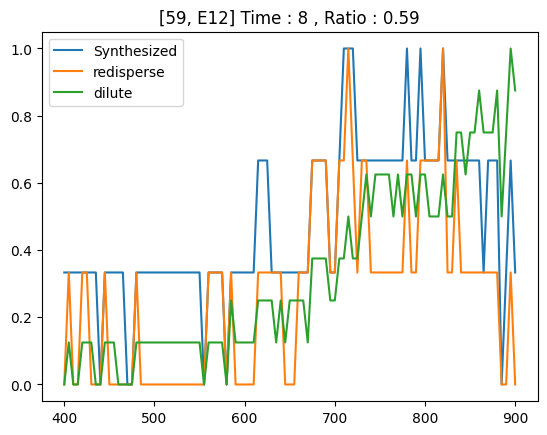

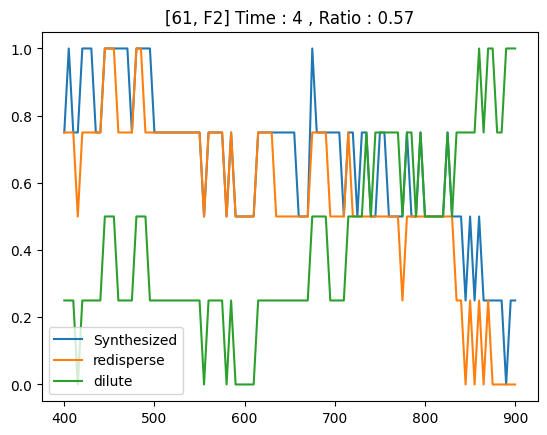

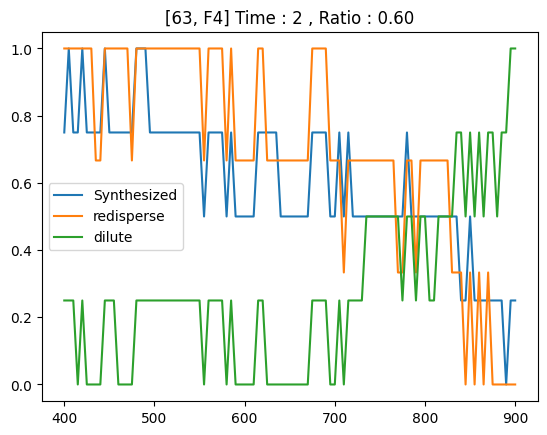

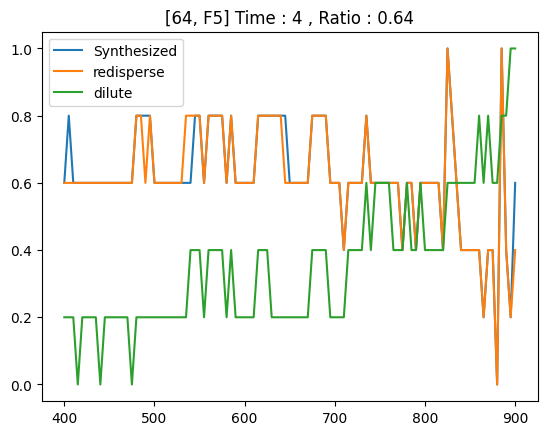

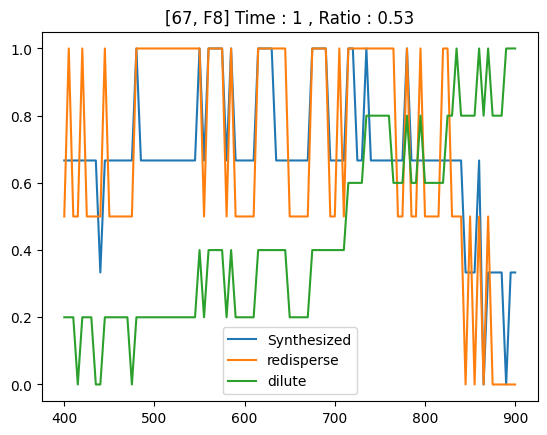

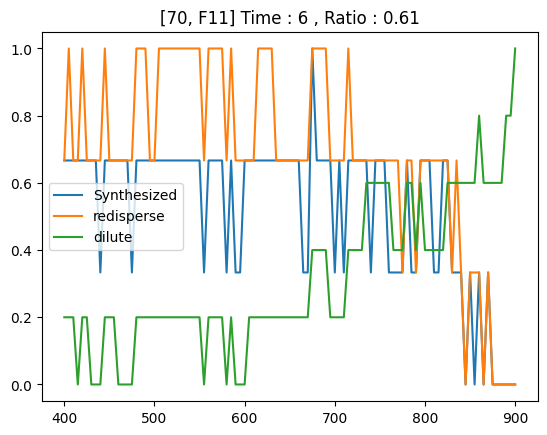

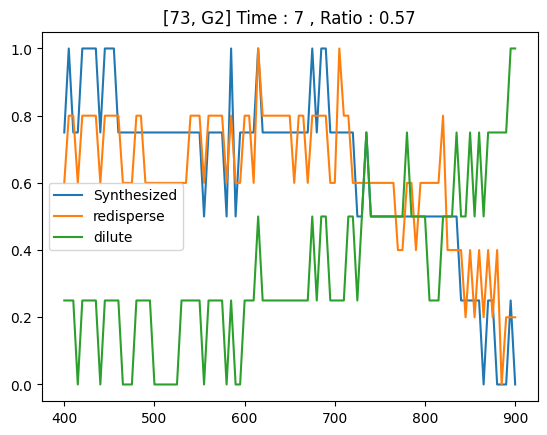

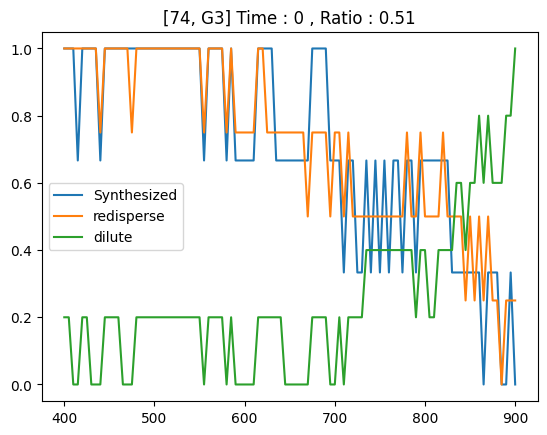

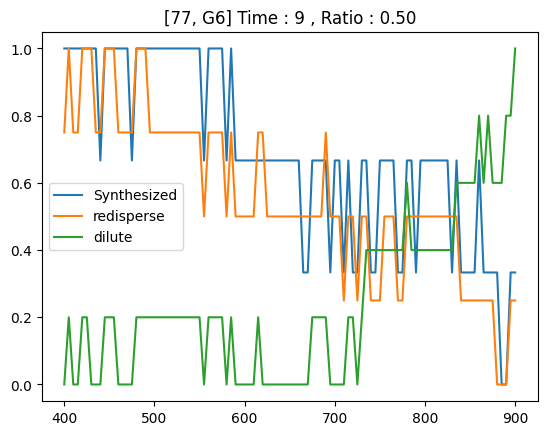

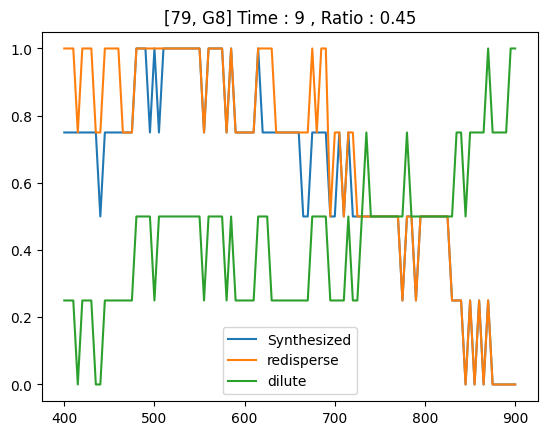

In [10]:
for i, well_name in enumerate(well_names):
    time = times["DT4"].values[i]
    ratio = ratio_BA[i]
    if (as_synthesized[well_name].values<0.1).all():
        fig, ax = plt.subplots()
        ax.plot(wavelength, background_correct_normalize(as_synthesized[well_name].values), label="Synthesized")
        ax.plot(wavelength, background_correct_normalize(redisperse[well_name].values), label="redisperse")
        ax.plot(wavelength, background_correct_normalize(dilute[well_name].values), label="dilute")
        ax.set_title("[%d, %s] Time : %d , Ratio : %.2f"%(i, well_name, time, ratio))
        ax.legend()
        plt.show()

In [11]:
flags_noNP = [(as_synthesized[well_name].values<0.1).all() for well_name in well_names]
volumes.iloc[flags_noNP, :]

Water  HEPES  Z2M246I  Au  Z2
30     39     54       87  13  87
44     39     54       87  13  87
51     39     54       87  13  87
53     39     54       87  13  87
58     65     54       87  13  61
59     51     54       87  13  75
61     55     54       87  13  71
63     49     54       87  13  77
64     39     54       87  13  87
67     62     54       87  13  64
70     48     54       87  13  78
73     56     54       87  13  70
74     66     54       87  13  60
77     67     54       87  13  59
79     75     54       87  13  51

Water      39
HEPES      54
Z2M246I    87
Au         13
Z2         87
Name: 51, dtype: int64
Time delay :  0


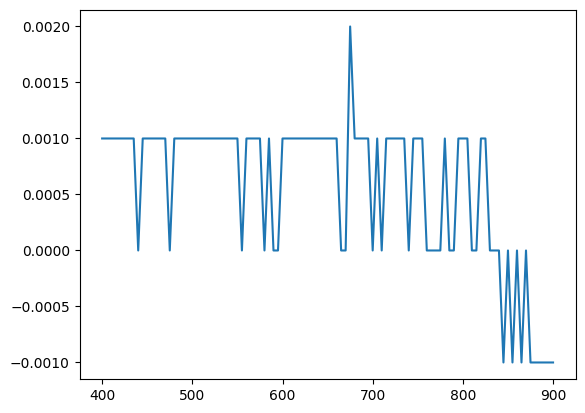

In [12]:
# Inspect any given well
well_name = "F11"
ind = np.argwhere(as_synthesized.columns=="E4").item()-1
y = as_synthesized[well_name].values
y = y-water
fig, ax = plt.subplots()
ax.plot(wavelength, y)
print(volumes.iloc[ind,:])
print("Time delay : ", times.iloc[ind,-1])
plt.show()